## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

##### 1. Random Choose Method to get optimal k* and *b

In [43]:
%matplotlib inline
import random

In [48]:
from sklearn.datasets import load_boston
data = load_boston()
x, y = data['data'], data['target']
# ÊàøÈó¥Êï∞Èáè
x_rm = x[:, 5]

In [50]:
def draw_rm_price() : 
    plt.scatter(x[:, 5], y)
    
def price(rm, k, b) : 
    return k * rm + b

def loss(y, y_hat) : 
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [59]:
# 1. Random Choose Method to get optimal k* and *b
def gen_best_by_random(try_times) : 
    """ÈöèÊú∫ÁîüÊàêk„ÄÅbÔºåËé∑ÂèñÊúÄÊé•ËøëÁöÑk„ÄÅ b"""
    min_loss = float('inf')
    best_k, best_b = None, None
    for i in range(try_times) : 
        k = random.randint(-100, 100)
        b = random.randint(-100, 100)
        price_rm = [price(rm, k, b) for rm in x_rm]

        current_loss = loss(y, price_rm)
        if current_loss < min_loss : 
            min_loss = current_loss
            best_k = k
            best_b = b
#             print("times {}, min loss {}, best k {}, best b {}".format(i, min_loss, best_k, best_b))
            
    print("min loss {}, best k {}, best b {}".format(min_loss, best_k, best_b))

    best_price_rm = [price(rm, best_k, best_b) for rm in x_rm]
    draw_rm_price()
    plt.scatter(x_rm, best_price_rm)

min loss 43.6065241245059, best k 9, best b -34


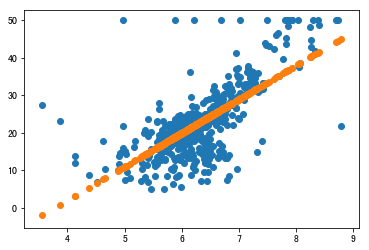

In [60]:
gen_best_by_random(100000)

##### 2.Supervised Direction to get optimal k* and *b

In [61]:
def gen_best_by_supervised(try_times) : 
    """ÊéßÂà∂ÂèòÂåñÊñπÂêë k„ÄÅbÁöÑÊ≠£Ë¥üÂΩ±ÂìçÁùÄËØØÂ∑ÆÁöÑÂèòÂåñ"""
    min_loss = float('inf')
    best_k, best_b = None, None
    
    """ÂàùÂßãÂåñ‰∏ÄÁªÑk„ÄÅb"""
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    """ÂèòÂåñÊñπÂêë ÂàÜÂà´‰∏∫ k„ÄÅbÁöÑÂèòÂåñÊñπÂêë"""
    direction = [
        (+1, +1),
        (+1, -1),
        (-1, +1),
        (-1, -1)
    ]
    scanner = 0.1
    
    next_direction = random.choice(direction)
    for i in range(try_times) : 
        k_direction, b_direction = next_direction
        
        if best_k == None : best_k = k
        if best_b == None : best_b = b
        
        current_k, current_b = best_k + k_direction * scanner, best_b + b_direction * scanner
        price_rm = [price(rm, current_k, current_b) for rm in x_rm]

        current_loss = loss(y, price_rm)
        if current_loss < min_loss : 
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            next_direction = next_direction
#             print("times {}, min loss {}, best k {}, best b {}".format(i, min_loss, best_k, best_b))
        else : 
            next_direction = random.choice(list(set(direction) - {next_direction}))

    print("min loss {}, best k {}, best b {}".format(min_loss, best_k, best_b))
    
    best_price_rm = [price(rm, best_k, best_b) for rm in x_rm]
    draw_rm_price()
    plt.scatter(x_rm, best_price_rm)

min loss 44.41802604398267, best k 7.886029045198331, best b -26.729922886162743


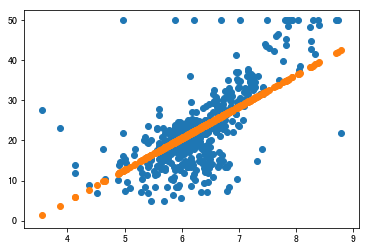

In [63]:
gen_best_by_supervised(100000)

##### 3.Gradient Descent to get optimal k* and *b

* Ê¢ØÂ∫¶‰∏ãÈôç ÔºöÊÄé‰πàÊâæÂà∞ÊúÄ‰ΩéÁÇπÔºü
$$ loss() = sum((y - hat(y))^2) / n $$
    

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

##### 4. Try different Loss function and learning rate.

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: Â§çÊùÇÁöÑÂÖ¨ÂºèÈúÄË¶ÅÂ§ßÈáèÁöÑÂ∑•‰ΩúÔºåËÄå‰∏îÊ∂µÁõñ‰∏çÂÖ®ÔºåËÄåÊú∫Âô®Â≠¶‰π†ÂèØ‰ª•Âú®Â∑≤ÊúâÂü∫Á°Ä‰∏äËøõË°åË∞ÉÊï¥ÔºåÊõ¥ÁÅµÊ¥ª„ÄÇ

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: ËÆ°ÁÆóÈáèÂ§ßÔºåËÄå‰∏î k„ÄÅbÊØèÊ¨°ÈÉΩÊòØÈöèÊú∫ÈáèÔºåÊó†Ê≥ïÈ¢ÑÁü•ÂèòÂåñÊñπÂêëÔºåÊâÄÊúâÁªìÊûúÈÉΩÊòØÊú™Áü•ÁöÑÔºåÂèØËÉΩÊúÄ‰ºòÁöÑÁªìÊûúÂπ∂ÈùûÊúÄÂ•ΩÁöÑÁªìÊûú„ÄÇ

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: Áõ∏ËæÉ‰∫éÊñπÊ≥ï‰∏ÄÔºåÊñπÊ≥ï‰∫åÈÄöËøáÊéßÂà∂ÂèòÂåñÊñπÂêëÔºå‰ΩøËØØÂ∑ÆËÉΩÂ§üÊúùÊåáÁÇπÂèòÂåñÊñπÂêëÊåÅÁª≠ÂèòÂåñÔºåÂ¶ÇÊûúÂèëÁé∞‰∏çÂØπËÉΩÂ§üË∞ÉÊï¥ÂèòÂåñÊñπÂêëÔºåËÄåÊñπÊ≥ï‰∏ÄÊï¥‰∏™ËøáÁ®ãÈÉΩÊòØ‰∏çÂèØÊéßÁöÑÈöèÊú∫ÁöÑËØØÂ∑ÆÂæàÂ§ß„ÄÇÊñπÊ≥ï‰∫åÁöÑÁº∫ÁÇπÊòØ‰ªçÁÑ∂ÈúÄË¶ÅÂ§ßÈáèÁöÑËÆ°ÁÆó„ÄÅÊñπÂêë‰πü‰∏çËÉΩ‰øùËØÅ‰∏ÄÁõ¥Âú®ÊúùÂ•ΩÁöÑÊñπÂêëÂèòÂåñ„ÄÇ

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: ÈÄöËøáÂ§ßÈáèÊï∞ÊçÆ„ÄÅÈáçÂ§çËøêÁÆóÔºå‰ΩøËÆ°ÁÆóÊú∫Âú®ËøêÁÆóËøáÁ®ã‰∏≠‰∏çÊñ≠Êé•ËøëÈ¢ÑÊúüÂÄºÂπ∂ÂÅöÂà∞ÊôÆÈÅçÈÄÇÁî®ÔºåËÄå‰∏îÂêéÁª≠Ê†πÊçÆÊï∞ÊçÆÂèòÂåñÂèØ‰ª•ËøõË°åË∞ÉÊï¥„ÄÇ

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [64]:
# ÂÆâË£Ö Beautiful Soup
!pip install beautifulsoup4

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [65]:
# Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫øËΩ¶Á´ôÂàóË°®/Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫ø Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫øËΩ¶Á´ôÂàóË°®/Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫øÈ¶ñÊú´ËΩ¶Êó∂Èó¥Ë°®
# Âåó‰∫¨Âú∞ÈìÅ4Âè∑Á∫ø Âåó‰∫¨Âú∞ÈìÅ4Âè∑Á∫øËΩ¶Á´ôÂàóË°®/Âåó‰∫¨Âú∞ÈìÅ4Âè∑Á∫øÈ¶ñÊú´Áè≠ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ5Âè∑Á∫ø Âåó‰∫¨Âú∞ÈìÅ5Âè∑Á∫øËΩ¶Á´ôÂàóË°®/5Âè∑Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ6Âè∑Á∫ø Âåó‰∫¨Âú∞ÈìÅ6Âè∑Á∫øËΩ¶Á´ôÂàóË°®/6Âè∑Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ7Âè∑Á∫ø Âåó‰∫¨Âú∞ÈìÅ7Âè∑Á∫øËΩ¶Á´ôÂàóË°®/7Âè∑Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂåóÊÆµÔºâÂåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øËΩ¶Á´ôÂàóË°®/Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂåóÊÆµÔºâÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂçóÊÆµÔºâÂåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øËΩ¶Á´ôÂàóË°®/Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂçóÊÆµÔºâÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ9Âè∑Á∫ø Âåó‰∫¨Âú∞ÈìÅ9Âè∑Á∫øËΩ¶Á´ôÂàóË°®/9Âè∑Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ10Âè∑Á∫ø Âåó‰∫¨Âú∞ÈìÅ10Âè∑Á∫øËΩ¶Á´ôÂàóË°®/10Âè∑Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ13Âè∑Á∫ø ËΩ¶Á´ôÂàóË°®/13Âè∑Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ14Âè∑Á∫øÔºàË•øÊÆµÔºâÂåó‰∫¨Âú∞ÈìÅ14Âè∑Á∫øËΩ¶Á´ôÂàóË°®/14Âè∑Á∫øÔºàË•øÊÆµÔºâÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ14Âè∑Á∫øÔºà‰∏úÊÆµÔºâÂåó‰∫¨Âú∞ÈìÅ14Âè∑Á∫øËΩ¶Á´ôÂàóË°®/14Âè∑Á∫ø‰∏úÊÆµÔºàÂê´‰∏≠ÊÆµÔºâÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ15Âè∑Á∫ø Âåó‰∫¨Âú∞ÈìÅ15Âè∑Á∫øËΩ¶Á´ôÂàóË°®/Âåó‰∫¨Âú∞ÈìÅ15Âè∑Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ16Âè∑Á∫ø ËΩ¶Á´ôÂàóË°®/È¶ñÊú´ËΩ¶Êó∂Èó¥
# Âåó‰∫¨Âú∞ÈìÅÂÖ´ÈÄöÁ∫ø Âåó‰∫¨Âú∞ÈìÅÂÖ´ÈÄöÁ∫øËΩ¶Á´ôÂàóË°®/ÂÖ´ÈÄöÁ∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅÊòåÂπ≥Á∫ø Âåó‰∫¨Âú∞ÈìÅÊòåÂπ≥Á∫øËΩ¶Á´ôÂàóË°®/ÊòåÂπ≥Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅ‰∫¶Â∫ÑÁ∫ø ËΩ¶Á´ô‰ø°ÊÅØ
# Âåó‰∫¨Âú∞ÈìÅÊàøÂ±±Á∫ø Âåó‰∫¨Âú∞ÈìÅÊàøÂ±±Á∫øËΩ¶Á´ôÂàóË°®/ÊàøÂ±±Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅS1Á∫ø ËΩ¶Á´ôÂàóË°®/Âåó‰∫¨Âú∞ÈìÅS1Á∫øÈ¶ñÊú´ËΩ¶Êó∂ÂàªË°®
# Âåó‰∫¨Âú∞ÈìÅÁáïÊàøÁ∫ø ËΩ¶Á´ôÂàóË°®/ËøêËê•Êó∂Âàª

In [82]:
# spider
import requests
from bs4 import BeautifulSoup
import re
import networkx as nx
import matplotlib.pyplot as plt

#Á´ôÁÇπÁ±ª 
class Station :
    """
    name : Á´ôÁÇπÂêç
    line_lable : ÊâÄÂ±ûÁ∫ø
    next_stations : ËøûÊé•ÁöÑÁ´ôÁÇπ
    """
    def __init__(self, name="", line_lable="", next_stations = []):
        self.name, self.line_lable, self.next_stations = name, line_lable, next_stations
        
    def setName(self, name="") : self.name = name
    def getName(self) : return self.name

    def setLineLable(self, line_lable="") : self.line_lable = line_lable
    def getLineLable(self) : return self.line_lable 
    
    def setNextStations(self, next_stations = []) : self.next_stations = next_stations
    def getNextStations(self) : return self.next_stations    
    
    def to_str(self) : 
        return "name = " + self.name + ",line_lable = " + self.line_lable + ",next_stations = " + str(self.next_stations)
    
# ËØ∑Ê±ÇÂ§¥
def headers() : 
    header = {
     "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.89 "
     "Safari/537.36"
     }
    return header

# Á´ôÁÇπurl
def source() : 
    return 'https://baike.baidu.com'

# ËØ¶ÊÉÖurl
def contact_item(item) : 
    return source() + item

# Áà¨ÂèñÊ∫êÁ†Å
def spider(url, encode) : 
    header = headers()
    res = requests.get(url,  headers=header)
    res.encoding = encode
    soup = BeautifulSoup(res.text)
    return soup

# Âú∞ÈìÅÁ∫ø + ÈìæÊé•
def line_and_href(tables) : 
    lfs = {}
    for t in tables : 
        tds = t.find_all('td')
        for td in tds : 
            if re.findall(r'Âåó‰∫¨Âú∞ÈìÅ.*Á∫ø', str(td)) : 
                lfs[td.get_text()] = td.a.get('href')
    return lfs

# Ëé∑ÂèñÊâÄÊúâÂú∞ÈìÅÁ∫øÂèäÈìæÊé•
def all_lfs(soup) : 
    tables = soup.find_all('table')
    pat = r"<tr><th.*>Á∫øË∑Ø</th><th.*>Ëµ∑Ê≠¢ÁÇπ</th><th.*>È¶ñÁè≠</th><th>Êú´Áè≠</th></tr><tr>"
    mts = [t for t in tables if re.findall(pat, str(t))]
    lfs = line_and_href(mts)
    return lfs

def stations(lfs) : 
    # Âú∞ÈìÅË∑ØÁ∫ø
    lines = {}
    
    for k, v in lfs.items() : 
        preferred_pat = r"" + str(k[4:] + ".{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?").replace('(', '\(?').replace('Ôºà', 'Ôºà?').replace(')', '\)?').replace('Ôºâ', 'Ôºâ?')
        print("spider " + k)
        optional_pat = r"ËΩ¶Á´ô‰ø°ÊÅØ"
        special_pat = r"<tr><th.*>ËΩ¶?Á´ô?ÁºñÂè∑</th><th.*>ËΩ¶Á´ôÂêçÁß∞.*</th>.*<tr>"
        soup = spider(contact_item(v), 'utf-8')
        tables = soup.find_all('table')
        
        tagets = [tab for tab in tables if re.findall(preferred_pat, str(tab))]
        if  len(tagets) > 0 :
            print(preferred_pat)
            trs = tagets[0].find_all('tr')
            stations = [list(tr.children)[0].get_text() for tr in trs[1:] if list(tr.children) and (not re.findall(r"ÂèÇËÄÉ|ËΩ¶Á´ô|Êó∂Èó¥|ÊñπÂêë|ÂÖ®Á®ã|(Â§á?Ê≥®)|(\d{4}Âπ¥\d{1,2}Êúà)", str(tr)))]
            if re.findall(r"ÂÜÖ|Â§ñÁéØ", str(trs[0])) : 
                print("ÁéØÁ∫ø")
                stations.append(stations[0])
            lines[k] = stations
            continue
            
        tagets = [tab for tab in tables if re.findall(optional_pat, str(tab))]
        if  len(tagets) > 0 : 
            print(optional_pat)
            trs = tagets[0].find_all('tr')
            stations = [list(tr.children)[1].get_text().replace("\n", "") for tr in trs[1:] if list(tr.children) and (not re.findall(r"ÂèÇËÄÉ|Êó∂Èó¥|ÊñπÂêë|ÂÖ®Á®ã|(Â§á?Ê≥®)|(\d{4}Âπ¥\d{1,2}Êúà)", str(tr)))]
            if re.findall(r"ÂÜÖ|Â§ñÁéØ", str(trs[0])) : 
                print("ÁéØÁ∫ø")
                stations.append(stations[0])
            lines[k] = stations
            continue
            
        tagets = [tab for tab in tables if re.findall(special_pat, str(tab))]
        if  len(tagets) > 0 : 
            print(special_pat)
            trs = tagets[0].find_all('tr')
            stations = [list(tr.children)[1].get_text().replace("\n", "") for tr in trs[1:] if list(tr.children) and (not re.findall(r"ÂèÇËÄÉ|Êó∂Èó¥|ÊñπÂêë|ÂÖ®Á®ã|(Â§á?Ê≥®)", str(tr)))]
            if re.findall(r"[ÂÜÖÂ§ñ]ÁéØ", str(trs[0])) : 
                print("ÁéØÁ∫ø")
                stations.append(stations[0])
            lines[k] = stations
            continue     

    return lines
            
# ÁîüÊàêÂú∞ÈìÅÂõæ
def create_line_graph(lines) : 
    gragh = {}
    # ÁîüÊàêÊâÄÊúâÁ´ôÁÇπ‰ø°ÊÅØ    
    for line_lable,stations in lines.items() : 
        for station in stations : 
            s = Station(name=station, line_lable=line_lable, next_stations = [])
            if not station in gragh : 
                gragh[station] = s
    
    # ÂÖ≥ËÅîÊâÄÊúâÁõ∏ÈÇªÁ´ôÁÇπ
    for line_lable,stations in lines.items() : 
        for i, station in enumerate(stations) : 
            current_ = gragh[station]
            if i != 0 or i != len(stations) - 1 : 
                if i - 1 >= 0 : 
                    pre_station = stations[i - 1]
                    current_.setNextStations(current_.getNextStations() + [pre_station])
                
                if i + 1 <= len(stations) - 1 : 
                    next_station = stations[i + 1]
                    current_.setNextStations(current_.getNextStations() + [next_station])

    return gragh        

# Ë∑ØÁ∫øÊü•ËØ¢
def search(start, destination, gragh):
    pathes = [[start]]
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]

        if froninter in visitied: continue
            
        successors = gragh[froninter].getNextStations()
        
        for station in successors:
            if station in path: continue  # eliminate loop
                
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
        
        visitied.add(froninter)

# ÊâìÂç∞Ë∑ØÁ∫ø
def print_line(line, graph) : 
    print(" ---> ".join([station + "üöá(" + graph[station].getLineLable() + ")" for station in line]))

In [67]:
soup = spider(contact_item('/item/Âåó‰∫¨Âú∞ÈìÅ/408485'), 'utf-8')

In [68]:
lfs = all_lfs(soup)

In [69]:
lines = stations(lfs)

spider Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø
1Âè∑Á∫ø.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫ø
2Âè∑Á∫ø.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
ÁéØÁ∫ø
spider Âåó‰∫¨Âú∞ÈìÅ4Âè∑Á∫ø
4Âè∑Á∫ø.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ5Âè∑Á∫ø
5Âè∑Á∫ø.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ6Âè∑Á∫ø
6Âè∑Á∫ø.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ7Âè∑Á∫ø
7Âè∑Á∫ø.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂåóÊÆµÔºâ
8Âè∑Á∫øÔºà?ÂåóÊÆµÔºâ?.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂçóÊÆµÔºâ
8Âè∑Á∫øÔºà?ÂçóÊÆµÔºâ?.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ9Âè∑Á∫ø
9Âè∑Á∫ø.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ10Âè∑Á∫ø
10Âè∑Á∫ø.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
ÁéØÁ∫ø
spider Âåó‰∫¨Âú∞ÈìÅ13Âè∑Á∫ø
13Âè∑Á∫ø.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ14Âè∑Á∫øÔºàË•øÊÆµÔºâ
14Âè∑Á∫øÔºà?Ë•øÊÆµÔºâ?.{0,6}È¶ñÊú´Áè≠?ËΩ¶Êó∂[Âàª|Èó¥]Ë°®?
spider Âåó‰∫¨Âú∞ÈìÅ14Âè∑Á∫øÔºà‰∏úÊÆµÔºâ
14Âè∑Á∫øÔºà?‰∏úÊÆµÔºâ?

In [70]:
lines

{'Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø': ['ËãπÊûúÂõ≠',
  'Âè§Âüé',
  'ÂÖ´ËßíÊ∏∏‰πêÂõ≠',
  'ÂÖ´ÂÆùÂ±±',
  'ÁéâÊ≥âË∑Ø',
  '‰∫îÊ£µÊùæ',
  '‰∏áÂØøË∑Ø',
  'ÂÖ¨‰∏ªÂùü',
  'ÂÜõ‰∫ãÂçöÁâ©È¶Ü',
  'Êú®Ê®®Âú∞',
  'ÂçóÁ§ºÂ£´Ë∑Ø',
  'Â§çÂÖ¥Èó®',
  'Ë•øÂçï',
  'Â§©ÂÆâÈó®Ë•ø',
  'Â§©ÂÆâÈó®‰∏ú',
  'ÁéãÂ∫ú‰∫ï',
  '‰∏úÂçï',
  'Âª∫ÂõΩÈó®',
  'Ê∞∏ÂÆâÈáå',
  'ÂõΩË¥∏',
  'Â§ßÊúõË∑Ø',
  'ÂõõÊÉ†',
  'ÂõõÊÉ†‰∏ú'],
 'Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫ø': ['Ë•øÁõ¥Èó®',
  'ÁßØÊ∞¥ÊΩ≠',
  'ÈºìÊ•ºÂ§ßË°ó',
  'ÂÆâÂÆöÈó®',
  'ÈõçÂíåÂÆ´',
  '‰∏úÁõ¥Èó®',
  '‰∏úÂõõÂçÅÊù°',
  'ÊúùÈò≥Èó®',
  'Âª∫ÂõΩÈó®',
  'Âåó‰∫¨Á´ô',
  'Â¥áÊñáÈó®',
  'ÂâçÈó®',
  'ÂíåÂπ≥Èó®',
  'ÂÆ£Ê≠¶Èó®',
  'ÈïøÊ§øË°ó',
  'Â§çÂÖ¥Èó®',
  'ÈòúÊàêÈó®',
  'ËΩ¶ÂÖ¨Â∫Ñ',
  'Ë•øÁõ¥Èó®'],
 'Âåó‰∫¨Âú∞ÈìÅ4Âè∑Á∫ø': ['ÂÆâÊ≤≥Ê°•Âåó',
  'ÂåóÂÆ´Èó®',
  'Ë•øËãë',
  'ÂúÜÊòéÂõ≠',
  'Âåó‰∫¨Â§ßÂ≠¶‰∏úÈó®',
  '‰∏≠ÂÖ≥Êùë',
  'Êµ∑Ê∑ÄÈªÑÂ∫Ñ',
  '‰∫∫Ê∞ëÂ§ßÂ≠¶',
  'È≠èÂÖ¨Êùë',
  'ÂõΩÂÆ∂Âõæ‰π¶È¶Ü',
  'Âä®Áâ©Âõ≠',
  'Ë•øÁõ¥Èó®',
  'Êñ∞Ë°óÂè£',
  'Âπ≥ÂÆâÈáå',
  'Ë•øÂõõ',
  'ÁÅµÂ¢ÉËÉ°Âêå',
  'Ë•øÂçï',
  'ÂÆ£Ê≠¶Èó®',
  

In [91]:
line_graph = create_line_graph(lines)

In [92]:
line_graph

{'ËãπÊûúÂõ≠': <__main__.Station at 0xa232a2668>,
 'Âè§Âüé': <__main__.Station at 0xa23296c18>,
 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠': <__main__.Station at 0xa23296c50>,
 'ÂÖ´ÂÆùÂ±±': <__main__.Station at 0xa235dfba8>,
 'ÁéâÊ≥âË∑Ø': <__main__.Station at 0xa235dfd30>,
 '‰∫îÊ£µÊùæ': <__main__.Station at 0xa235dfb70>,
 '‰∏áÂØøË∑Ø': <__main__.Station at 0xa235dfc88>,
 'ÂÖ¨‰∏ªÂùü': <__main__.Station at 0xa235df9e8>,
 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü': <__main__.Station at 0xa235dff98>,
 'Êú®Ê®®Âú∞': <__main__.Station at 0x1a262ee6d8>,
 'ÂçóÁ§ºÂ£´Ë∑Ø': <__main__.Station at 0x1a262ee1d0>,
 'Â§çÂÖ¥Èó®': <__main__.Station at 0xa23508e48>,
 'Ë•øÂçï': <__main__.Station at 0xa23508e80>,
 'Â§©ÂÆâÈó®Ë•ø': <__main__.Station at 0xa235cd3c8>,
 'Â§©ÂÆâÈó®‰∏ú': <__main__.Station at 0x1a262a01d0>,
 'ÁéãÂ∫ú‰∫ï': <__main__.Station at 0x1a262a0080>,
 '‰∏úÂçï': <__main__.Station at 0x1a262a0b38>,
 'Âª∫ÂõΩÈó®': <__main__.Station at 0x1a262a0a90>,
 'Ê∞∏ÂÆâÈáå': <__main__.Station at 0x1a262a0898>,
 'ÂõΩË¥∏': <__main__.Station at 0x1a262a0978>,
 'Â

In [101]:
def print_line_graph(graph) : 
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    station_graph = nx.Graph()
#     station_graph.add_nodes_from(list(graph.keys()))
    for k, v in graph.items() : 
        for s in v.getNextStations() : 
            station_graph.add_edge(k, s)
    nx.draw(station_graph, with_labels = True, node_size = 10)

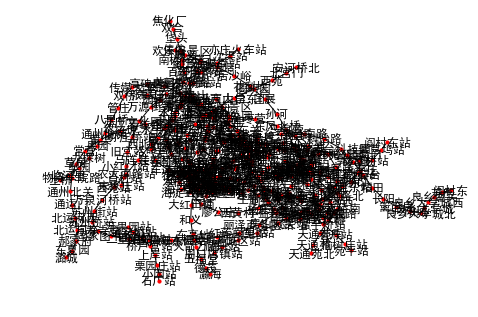

In [106]:
print_line_graph(line_graph)

In [72]:
line_graph['ËãπÊûúÂõ≠'].to_str()

"name = ËãπÊûúÂõ≠,line_lable = Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø,next_stations = ['Âè§Âüé', 'ÈáëÂÆâÊ°•', 'Êù®Â∫Ñ']"

In [73]:
line_graph['‰∏úÂçï'].to_str()

"name = ‰∏úÂçï,line_lable = Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø,next_stations = ['ÁéãÂ∫ú‰∫ï', 'Âª∫ÂõΩÈó®', 'Â¥áÊñáÈó®', 'ÁÅØÂ∏ÇÂè£']"

In [74]:
line_graph['Â∑¥Ê≤ü'].to_str()

"name = Â∑¥Ê≤ü,line_lable = Âåó‰∫¨Âú∞ÈìÅ10Âè∑Á∫ø,next_stations = ['ËãèÂ∑ûË°ó', 'ÁÅ´Âô®Ëê•']"

In [75]:
line_graph['Ë•øÁõ¥Èó®'].to_str()

"name = Ë•øÁõ¥Èó®,line_lable = Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫ø,next_stations = ['ÁßØÊ∞¥ÊΩ≠', 'ËΩ¶ÂÖ¨Â∫Ñ', 'Âä®Áâ©Âõ≠', 'Êñ∞Ë°óÂè£', 'ÊòéÂÖâÊ°•Ë•ø']"

In [76]:
line_graph['Âè§Âüé'].to_str()

"name = Âè§Âüé,line_lable = Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø,next_stations = ['ËãπÊûúÂõ≠', 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠']"

In [85]:
print_line(search('ËãπÊûúÂõ≠', '‰∏úÂçï', line_graph), line_graph)

ËãπÊûúÂõ≠üöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> Âè§Âüéüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÂÖ´ËßíÊ∏∏‰πêÂõ≠üöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÂÖ´ÂÆùÂ±±üöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÁéâÊ≥âË∑Øüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ‰∫îÊ£µÊùæüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ‰∏áÂØøË∑Øüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÂÖ¨‰∏ªÂùüüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÂÜõ‰∫ãÂçöÁâ©È¶Üüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> Êú®Ê®®Âú∞üöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÂçóÁ§ºÂ£´Ë∑Øüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> Â§çÂÖ¥Èó®üöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> Ë•øÂçïüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> Â§©ÂÆâÈó®Ë•øüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> Â§©ÂÆâÈó®‰∏úüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÁéãÂ∫ú‰∫ïüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ‰∏úÂçïüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø)


In [78]:
print_line(search('‰∫îÊ£µÊùæ', 'ÊñπÂ∫Ñ', line_graph), line_graph)

‰∫îÊ£µÊùæüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ‰∏áÂØøË∑Øüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÂÖ¨‰∏ªÂùüüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÂÜõ‰∫ãÂçöÁâ©È¶Üüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> Âåó‰∫¨Ë•øÁ´ôüöá(Âåó‰∫¨Âú∞ÈìÅ7Âè∑Á∫ø) ---> ÊπæÂ≠êüöá(Âåó‰∫¨Âú∞ÈìÅ7Âè∑Á∫ø) ---> ËææÂÆòËê•üöá(Âåó‰∫¨Âú∞ÈìÅ7Âè∑Á∫ø) ---> ÂπøÂÆâÈó®ÂÜÖüöá(Âåó‰∫¨Âú∞ÈìÅ7Âè∑Á∫ø) ---> ËèúÂ∏ÇÂè£üöá(Âåó‰∫¨Âú∞ÈìÅ4Âè∑Á∫ø) ---> Èô∂ÁÑ∂‰∫≠üöá(Âåó‰∫¨Âú∞ÈìÅ4Âè∑Á∫ø) ---> Âåó‰∫¨ÂçóÁ´ôüöá(Âåó‰∫¨Âú∞ÈìÅ4Âè∑Á∫ø) ---> Ê∞∏ÂÆöÈó®Â§ñüöá(Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂçóÊÆµÔºâ) ---> ÊôØÊ≥∞üöá(Âåó‰∫¨Âú∞ÈìÅ14Âè∑Á∫øÔºà‰∏úÊÆµÔºâ) ---> Ëí≤ÈªÑÊ¶Üüöá(Âåó‰∫¨Âú∞ÈìÅ5Âè∑Á∫ø) ---> ÊñπÂ∫Ñüöá(Âåó‰∫¨Âú∞ÈìÅ14Âè∑Á∫øÔºà‰∏úÊÆµÔºâ)


##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('Â••‰Ωì‰∏≠ÂøÉ', 'Â§©ÂÆâÈó®') 
```
you need get the result: 

Â••‰Ωì‰∏≠ÂøÉ-> A -> B -> C -> ... -> Â§©ÂÆâÈó®



In [83]:
print_line(search('Â••‰Ωì‰∏≠ÂøÉ', 'Â§©ÂÆâÈó®‰∏ú', line_graph), line_graph)

Â••‰Ωì‰∏≠ÂøÉüöá(Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂåóÊÆµÔºâ) ---> ÂåóÂúüÂüéüöá(Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂåóÊÆµÔºâ) ---> ÂÆâÂçéÊ°•üöá(Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂåóÊÆµÔºâ) ---> ÂÆâÂæ∑ÈáåÂåóË°óüöá(Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂåóÊÆµÔºâ) ---> ÈºìÊ•ºÂ§ßË°óüöá(Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫ø) ---> ‰ªÄÂàπÊµ∑üöá(Âåó‰∫¨Âú∞ÈìÅ8Âè∑Á∫øÔºàÂåóÊÆµÔºâ) ---> ÂçóÈî£ÈºìÂ∑∑üöá(Âåó‰∫¨Âú∞ÈìÅ6Âè∑Á∫ø) ---> ‰∏úÂõõüöá(Âåó‰∫¨Âú∞ÈìÅ5Âè∑Á∫ø) ---> ÁÅØÂ∏ÇÂè£üöá(Âåó‰∫¨Âú∞ÈìÅ5Âè∑Á∫ø) ---> ‰∏úÂçïüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> ÁéãÂ∫ú‰∫ïüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø) ---> Â§©ÂÆâÈó®‰∏úüöá(Âåó‰∫¨Âú∞ÈìÅ1Âè∑Á∫ø)


In [86]:
print_line(search('Ë•øÁõ¥Èó®', 'ÈºìÊ•ºÂ§ßË°ó', line_graph), line_graph)

Ë•øÁõ¥Èó®üöá(Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫ø) ---> ÁßØÊ∞¥ÊΩ≠üöá(Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫ø) ---> ÈºìÊ•ºÂ§ßË°óüöá(Âåó‰∫¨Âú∞ÈìÅ2Âè∑Á∫ø)


## ÔºàOptionalÔºâCreate different policies for transfer system.


‰ª•‰∏ãÈÉ®Èó®‰∏∫ÂèØÈÄâÈÉ®ÂàÜÔºåËØ∑ÈÖåÊÉÖÂÆåÊàê„ÄÇ Âπ∂‰∏çË¶ÅÊ±ÇÂÖ®ÈÉ®ÂêåÂ≠¶ÂÆåÊàê„ÄÇ

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path PriorityÔºàË∑ØÁ®ãÊúÄÁü≠‰ºòÂÖàÔºâ, Minimum Transfer Priority(ÊúÄÂ∞ëÊç¢‰πò‰ºòÂÖà), Comprehensive Priority(ÁªºÂêà‰ºòÂÖà)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, ‚Ä¶ .., C, ‚Ä¶. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A ‚Ä¶ C ‚Ä¶ E ‚Ä¶ D ‚Ä¶ B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

In [ ]:
def is_goal() : 
    pass

def get_successor() : 
    pass

def strategy() : 
    pass

# Ë∑ØÁ∫øÊü•ËØ¢
def search(start, destination, gragh):
    pathes = [[start]]
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]

        if froninter in visitied: continue
            
        successors = gragh[froninter].getNextStations()
        
        for station in successors:
            if station in path: continue  # eliminate loop
                
            new_path = path + [station]
            
            pathes.append(new_path)
            
            if station == destination: return new_path
        
        visitied.add(froninter)

##### 5.	Test your result with commercial applications. 

Â∞Ü‰Ω†ÁöÑÁªìÊûúÂíåÈ´òÂæ∑Âú∞ÂõæÊàñËÄÖÁôæÂ∫¶Âú∞ÂõæËøõË°åÊØîËæÉÔºåÂ¶ÇÊûúÊúâ‰∏çÂêåÔºåËØ∑ÂàÜÊûêÂéüÂõ†


ÊÅ≠ÂñúÔºåÂÆåÊàêÊú¨Ê¨°ËØæÁ®ãÔºå‰Ω†ÂØπÂ∏∏Áî®ÁöÑ‰∫∫Â∑•Êô∫ËÉΩÊñπÊ≥ï‰ª•ÂèäÊúâ‰∏ÄÂÆöÁöÑ‰∫ÜËß£‰∫Ü„ÄÇÂü∫‰∫éËßÑÂàôÁöÑÔºåÂü∫‰∫éÊ¶ÇÁéáÊ®°ÂûãÁöÑÔºåÂü∫‰∫éÊêúÁ¥¢ÁöÑÔºåÂü∫‰∫éÊú∫Âô®Â≠¶‰π†ÁöÑ„ÄÇ ÂèØ‰ª•ËØ¥ÔºåÊàë‰ª¨Áé∞Âú®ÈÄöÂ∏∏ËßÅÂà∞ÁöÑÊñπÊ≥ïÈÉΩËÉΩÂ§üÂΩíÂ±ûÂà∞ËøôÂá†Á±ªÊñπÊ≥ï‰∏≠„ÄÇ ËøôÂ∞±ÊòØ**‰∫∫Â∑•Êô∫ËÉΩ**ÔºåÂπ∂Ê≤°ÊúâÂæàÈöæÊòØÂêßÔºü ÁªßÁª≠Âä†Ê≤πÔºÅ

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)